In [62]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [63]:
batch_size = 128
num_classes = 10
epochs = 12

In [64]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [65]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [66]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Model 1 (3 ConvNets) 

In [6]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [15]:
model1_info=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 29s 488us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0223 - val_acc: 0.9939
Epoch 2/12
60000/60000 [==============================] - 29s 484us/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0237 - val_acc: 0.9934
Epoch 3/12
60000/60000 [==============================] - 29s 485us/step - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0217 - val_acc: 0.9947
Epoch 4/12
60000/60000 [==============================] - 29s 485us/step - loss: 0.0153 - acc: 0.9955 - val_loss: 0.0217 - val_acc: 0.9944
Epoch 5/12
60000/60000 [==============================] - 29s 484us/step - loss: 0.0143 - acc: 0.9958 - val_loss: 0.0216 - val_acc: 0.9943
Epoch 6/12
60000/60000 [==============================] - 29s 485us/step - loss: 0.0126 - acc: 0.9961 - val_loss: 0.0231 - val_acc: 0.9942
Epoch 7/12
60000/60000 [==============================] - 29s 485us/step - loss: 0.0114 - acc: 0.9962 - val_loss: 0.

In [16]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023229347566809905
Test accuracy: 0.9944


In [17]:
import time
import matplotlib.pyplot as plt
import numpy as np

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

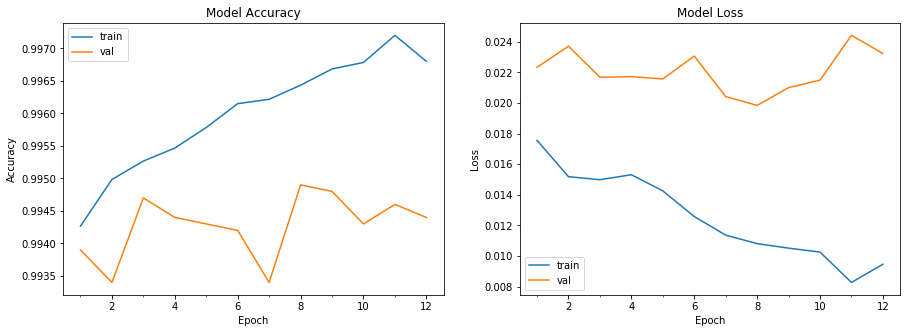

In [20]:
# plot model history
plot_model_history(model1_info)

### Model 2 

In [48]:
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

In [70]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [71]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [72]:
model2_info=model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 869us/step - loss: 0.3387 - acc: 0.8936 - val_loss: 0.0542 - val_acc: 0.9846
Epoch 2/12
60000/60000 [==============================] - 49s 813us/step - loss: 0.0838 - acc: 0.9780 - val_loss: 0.0352 - val_acc: 0.9901
Epoch 3/12
60000/60000 [==============================] - 49s 813us/step - loss: 0.0587 - acc: 0.9847 - val_loss: 0.0317 - val_acc: 0.9913
Epoch 4/12
60000/60000 [==============================] - 49s 814us/step - loss: 0.0458 - acc: 0.9885 - val_loss: 0.0258 - val_acc: 0.9921
Epoch 5/12
60000/60000 [==============================] - 49s 816us/step - loss: 0.0374 - acc: 0.9904 - val_loss: 0.0261 - val_acc: 0.9920
Epoch 6/12
60000/60000 [==============================] - 49s 816us/step - loss: 0.0344 - acc: 0.9910 - val_loss: 0.0289 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 49s 818us/step - loss: 0.0290 - acc: 0.9924 - val_loss: 0.

In [74]:
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.02478243281475957
Test accuracy: 0.9932


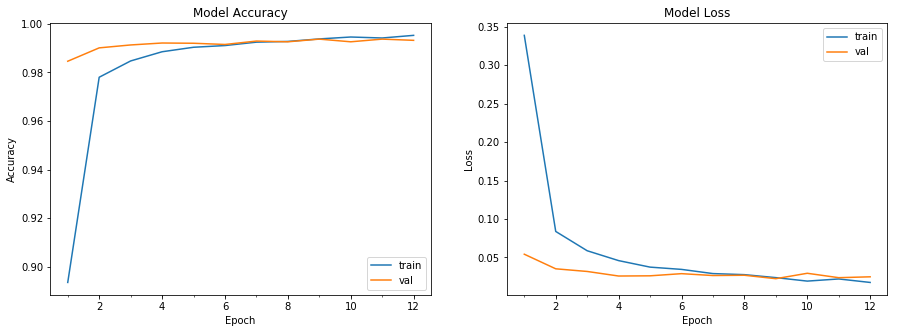

In [75]:
# plot model history
plot_model_history(model2_info)

### Model 3(6 layers) 

In [76]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(Conv2D(32, (2, 2), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

In [77]:
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [78]:
model3_info=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 36s 604us/step - loss: 0.7847 - acc: 0.7398 - val_loss: 0.1215 - val_acc: 0.9648
Epoch 2/12
60000/60000 [==============================] - 33s 548us/step - loss: 0.2155 - acc: 0.9370 - val_loss: 0.0875 - val_acc: 0.9740
Epoch 3/12
60000/60000 [==============================] - 33s 550us/step - loss: 0.1545 - acc: 0.9557 - val_loss: 0.0636 - val_acc: 0.9813
Epoch 4/12
60000/60000 [==============================] - 33s 550us/step - loss: 0.1289 - acc: 0.9641 - val_loss: 0.0619 - val_acc: 0.9822
Epoch 5/12
60000/60000 [==============================] - 33s 549us/step - loss: 0.1099 - acc: 0.9677 - val_loss: 0.0598 - val_acc: 0.9820
Epoch 6/12
60000/60000 [==============================] - 33s 550us/step - loss: 0.0998 - acc: 0.9716 - val_loss: 0.0592 - val_acc: 0.9816
Epoch 7/12
60000/60000 [==============================] - 33s 549us/step - loss: 0.0882 - acc: 0.9748 - val_loss: 0.

In [80]:
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.050386846129961485
Test accuracy: 0.9846


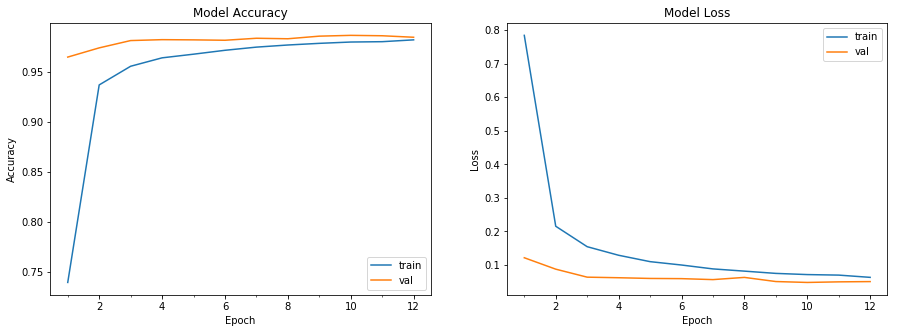

In [81]:
# plot model history
plot_model_history(model3_info)

# Conclusion

In [86]:
from prettytable import PrettyTable


model=['Model1', 'Model2','Model3']
# Names of the models
names =['3ConvNet+Dropout+Maxpooling', '4ConvNet+Dropout+Maxpooling', '6ConvNet+Dropout+Maxpooling+BatchNorm']


# Test Accuracies
test_acc=[0.9944,0.9932,0.9846]


# Initializing prettytable
ptable = PrettyTable()

# Adding columns

ptable.add_column("MODEL",model)
ptable.add_column("Model Names",names)
ptable.add_column("Test Accuracy",test_acc)

# Printing the Table
print(ptable)


+--------+---------------------------------------+---------------+
| MODEL  |              Model Names              | Test Accuracy |
+--------+---------------------------------------+---------------+
| Model1 |      3ConvNet+Dropout+Maxpooling      |     0.9944    |
| Model2 |      4ConvNet+Dropout+Maxpooling      |     0.9932    |
| Model3 | 6ConvNet+Dropout+Maxpooling+BatchNorm |     0.9846    |
+--------+---------------------------------------+---------------+
